# COVID-19 Gender Dataset Analysis

In this project, we'll look at the covid-19 cases and confirmed deaths, from april to september of 2020, for the state of Connecticut. We will answer the following questions:

* Were there more male or female cases each month? Are males more likely to catch the virus versus females?
* How did confirmed cases and total deaths change over time?

Lets start the imports:

In [14]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import calendar

In [15]:
df = pd.read_csv('COVID-19_Cases_and_Deaths_by_Gender.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   DateUpdated       285 non-null    object 
 1   Gender            285 non-null    object 
 2   Total cases       285 non-null    int64  
 3   Confirmed cases   164 non-null    float64
 4   Probable cases    164 non-null    float64
 5   Total case rate   272 non-null    float64
 6   Total deaths      276 non-null    float64
 7   Confirmed deaths  164 non-null    float64
 8   Probable deaths   164 non-null    float64
dtypes: float64(6), int64(1), object(2)
memory usage: 20.2+ KB


,DateUpdated,Gender,Total cases,Confirmed cases,Probable cases,Total case rate,Total deaths,Confirmed deaths,Probable deaths
0,05/21/2020,Female,21692,NaN,NaN,1186.0,1838.0,NaN,NaN
1,05/21/2020,Male,17738,NaN,NaN,1017.0,1790.0,NaN,NaN
2,05/22/2020,Female,21879,NaN,NaN,1196.0,1860.0,NaN,NaN
3,05/22/2020,Male,17913,NaN,NaN,1027.0,1805.0,NaN,NaN
4,05/23/2020,Female,22099,NaN,NaN,1208.0,1863.0,NaN,NaN


In [16]:
df['DateUpdated']

0      05/21/2020
1      05/21/2020
2      05/22/2020
3      05/22/2020
4      05/23/2020
          ...    
280    09/08/2020
281    09/09/2020
282    09/09/2020
283    09/10/2020
284    09/10/2020
Name: DateUpdated, Length: 285, dtype: object

Lets take a look at the total cases/deaths grouped by gender.

In [17]:
df1 = df.groupby('Gender')
print(df1.first())

       DateUpdated  Total cases  Confirmed cases  Probable cases  \
Gender                                                             
Female  05/21/2020        21692          22251.0          1139.0   
Male    05/21/2020        17738          18216.0           918.0   
Other   04/11/2020            1              NaN             NaN   

        Total case rate  Total deaths  Confirmed deaths  Probable deaths  
Gender                                                                    
Female           1186.0        1838.0            1578.0            474.0  
Male             1017.0        1790.0            1530.0            383.0  
Other               NaN           NaN               NaN              NaN  


Lets modify the 'DateUpdated' column to create 'Month'. groupby Gender and view by months

In [18]:
#df.rename(columns={'DateUpdated':'Month'})
df['DateUpdated']= pd.to_datetime(df['DateUpdated'])
df['DateUpdated'] = sorted(df['DateUpdated'])
df['month'] = df['DateUpdated'].dt.month_name()

## Were there more Male/Female cases each month?

Lets graph the Total cases by each month

<ipython-input-19-247c4e483ada>:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


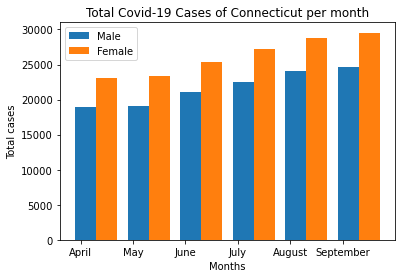

In [19]:
labels = ['', 'April', 'May', 'June', 'July', 'August', 'September']

males = []
females = []
for i in range(len(labels)-1):
    num = df[(df['Gender'] == 'Male') & (df['month'] == labels[i+1])]
    num2 = num['Total cases'].max()
    males.append(num2)
for i in range(len(labels)-1):
    num = df[(df['Gender'] == 'Female') & (df['month'] == labels[i+1])]
    num2 = num['Total cases'].max()
    females.append(num2)

ax = plt.subplot()

n = 1  # This is our first dataset (out of 2)
t = 2 # Number of datasets
d = 6 # Number of sets of bars
w = .2 # Width of each bar
store1_x = [t*element + w*n for element
             in range(d)]
ax.bar(store1_x, males)

n = 2  # This is our first dataset (out of 2)
t = 2 # Number of datasets
d = 6 # Number of sets of bars
w = .5 # Width of each bar
store2_x = [t*element + w*n for element
             in range(d)]
ax.bar(store2_x, females)          

ax.set_xticklabels(labels)
plt.xlabel('Months')
plt.ylabel('Total cases')
plt.title('Total Covid-19 Cases of Connecticut per month')
plt.legend(['Male', 'Female'])
plt.show()

Clearly we can observe that more Females were testing positives each month than Males. Predicting that Males are less likely to catch the virus. Cases have been gaining a steady incline throughout these past 6 months.

## How did confirmed cases/Total deaths change over time?

[23080, 23390, 25414, 27191, 28817, 29536]
[2043.0, 2052.0, 2261.0, 2324.0, 2341.0, 2348.0]


<ipython-input-20-4e3d9690e149>:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)
<ipython-input-20-4e3d9690e149>:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  bx.set_xticklabels(labels)


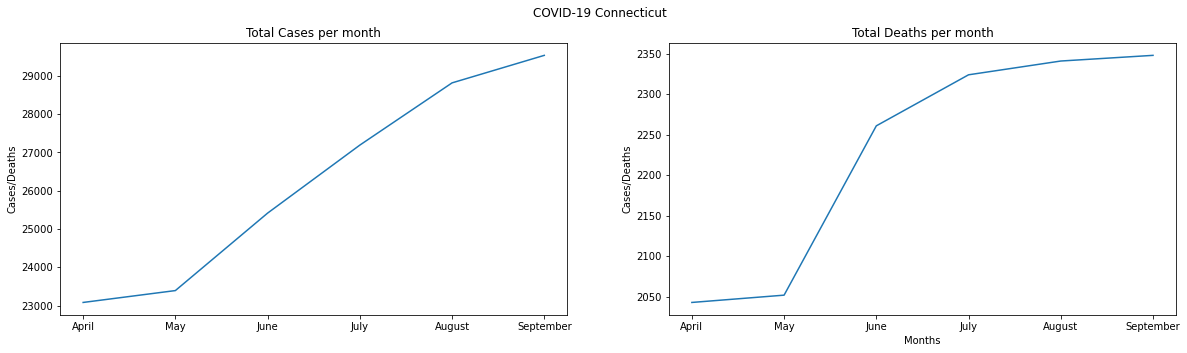

In [20]:
months = ['April', 'May', 'June', 'July', 'August', 'September']
d =[]
c =[]

for i in range(len(labels)-1):
    num = df[df['month'] == labels[i+1]]
    num2 = num['Total deaths'].max()
    d.append(num2)
for i in range(len(labels)-1):
    num = df[df['month'] == labels[i+1]]
    num2 = num['Total cases'].max()
    c.append(num2)
    
print(c)
print(d)
ax_yticks = ['', 400000, 600000, 800000, 1000000, 1200000]


f = plt.figure(figsize=(20,5))
f.suptitle('COVID-19 Connecticut')
ax = f.add_subplot(121)
bx = f.add_subplot(122)
ax.plot(range(len(months)), c)
bx.plot(range(len(months)), d)
plt.xlabel('Months')
ax.set_ylabel('Cases/Deaths')
bx.set_ylabel('Cases/Deaths')
ax.set_xticklabels(labels)
bx.set_xticklabels(labels)
ax.set_title('Total Cases per month')
bx.set_title('Total Deaths per month')
plt.show()

Total deaths curve seems to be flattening during august. As the months pass, more people are wearing masks and socially distancing themselves properly; resulting in fewer deaths. However, Total cases seem to be rising, news indicates young adults seem to be the source of these new cases.